# Teoria

- problemi non lineari con pochi dati e poche risorse di calcolo

## Support vector classifier SVC

- obiettivo: massimizzare distanza tra le diverse classi

1. si parte da maximal margin classifier, ovvero un classificatore che tiene conto solo delle 2 obs delle 2 classi più vicine


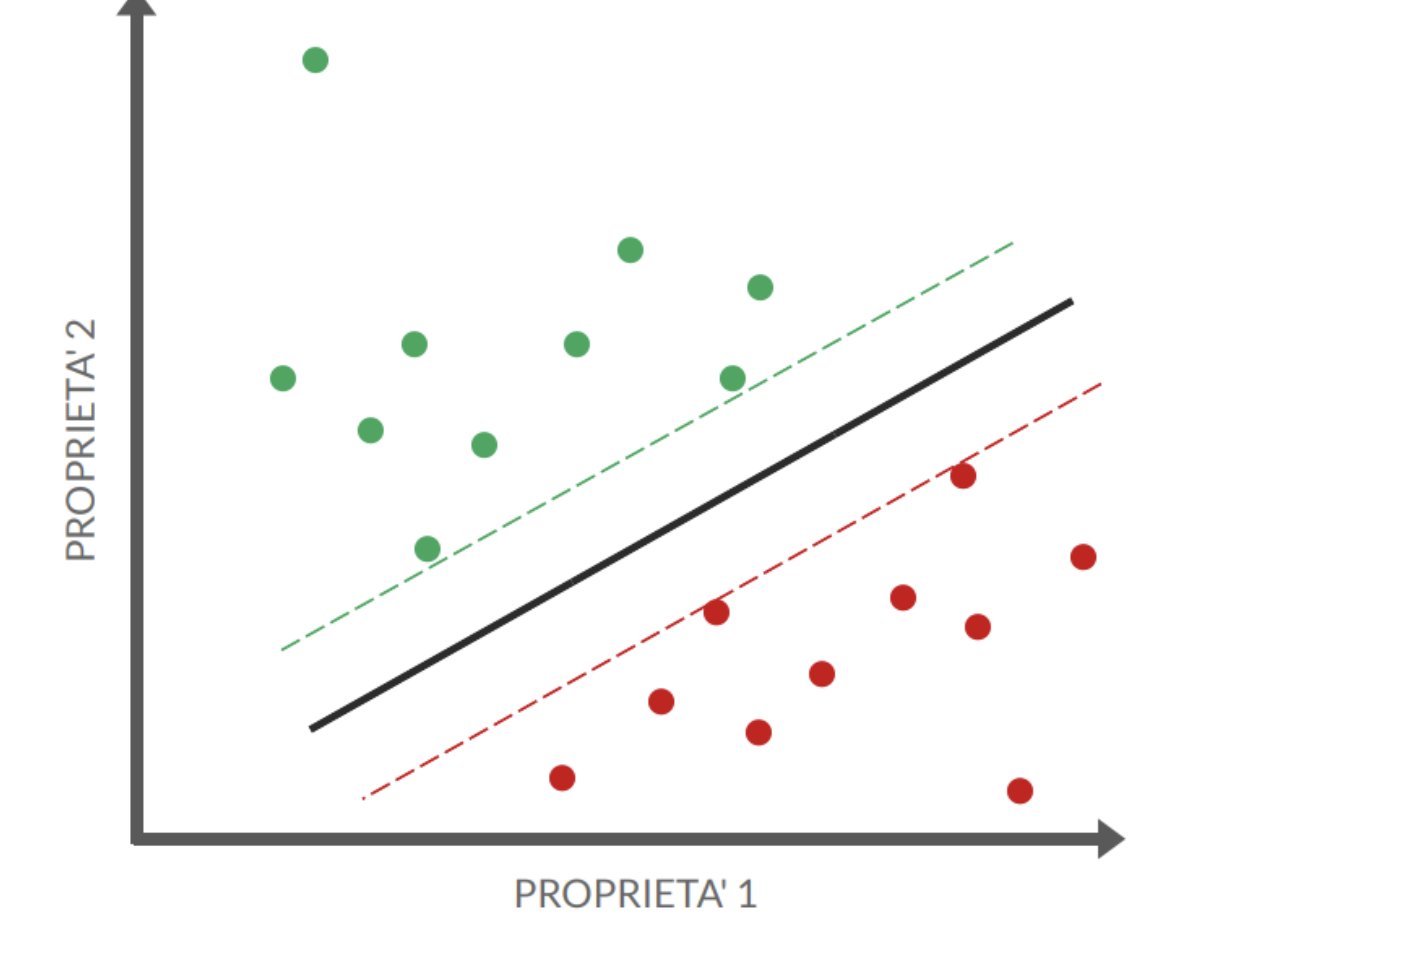

2. i vettori si definiscono margini

estremamente sensibile alla presenza di outliars
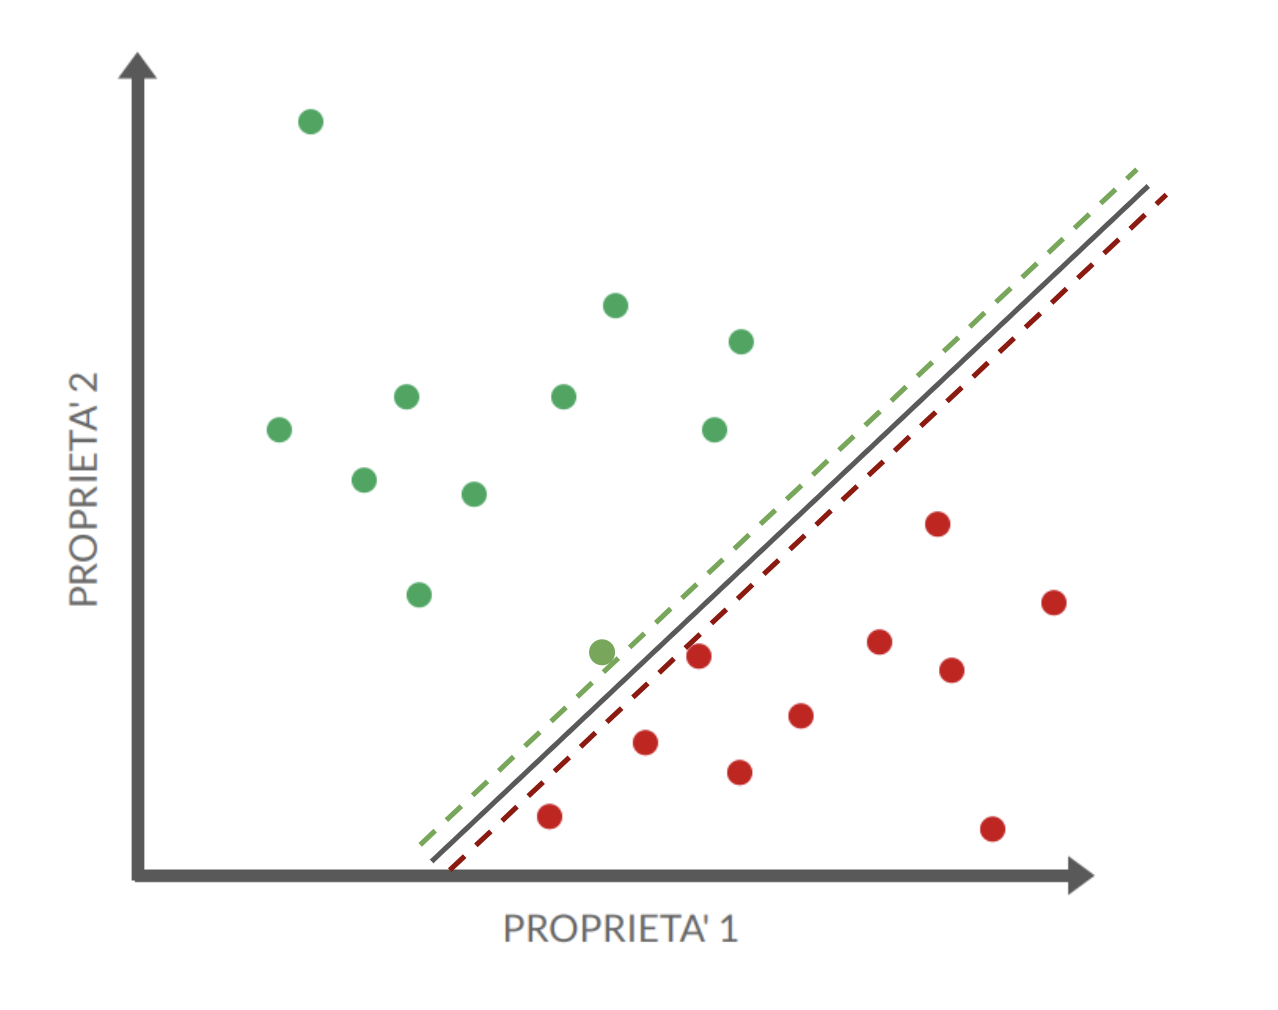

quanto più stretti sono i margini , quanto più è incerto il classificatore

**SVC**

l'SVC accetta di avere anche classificazioni non corrette all'interno dei margini (SOFT MARGIN)

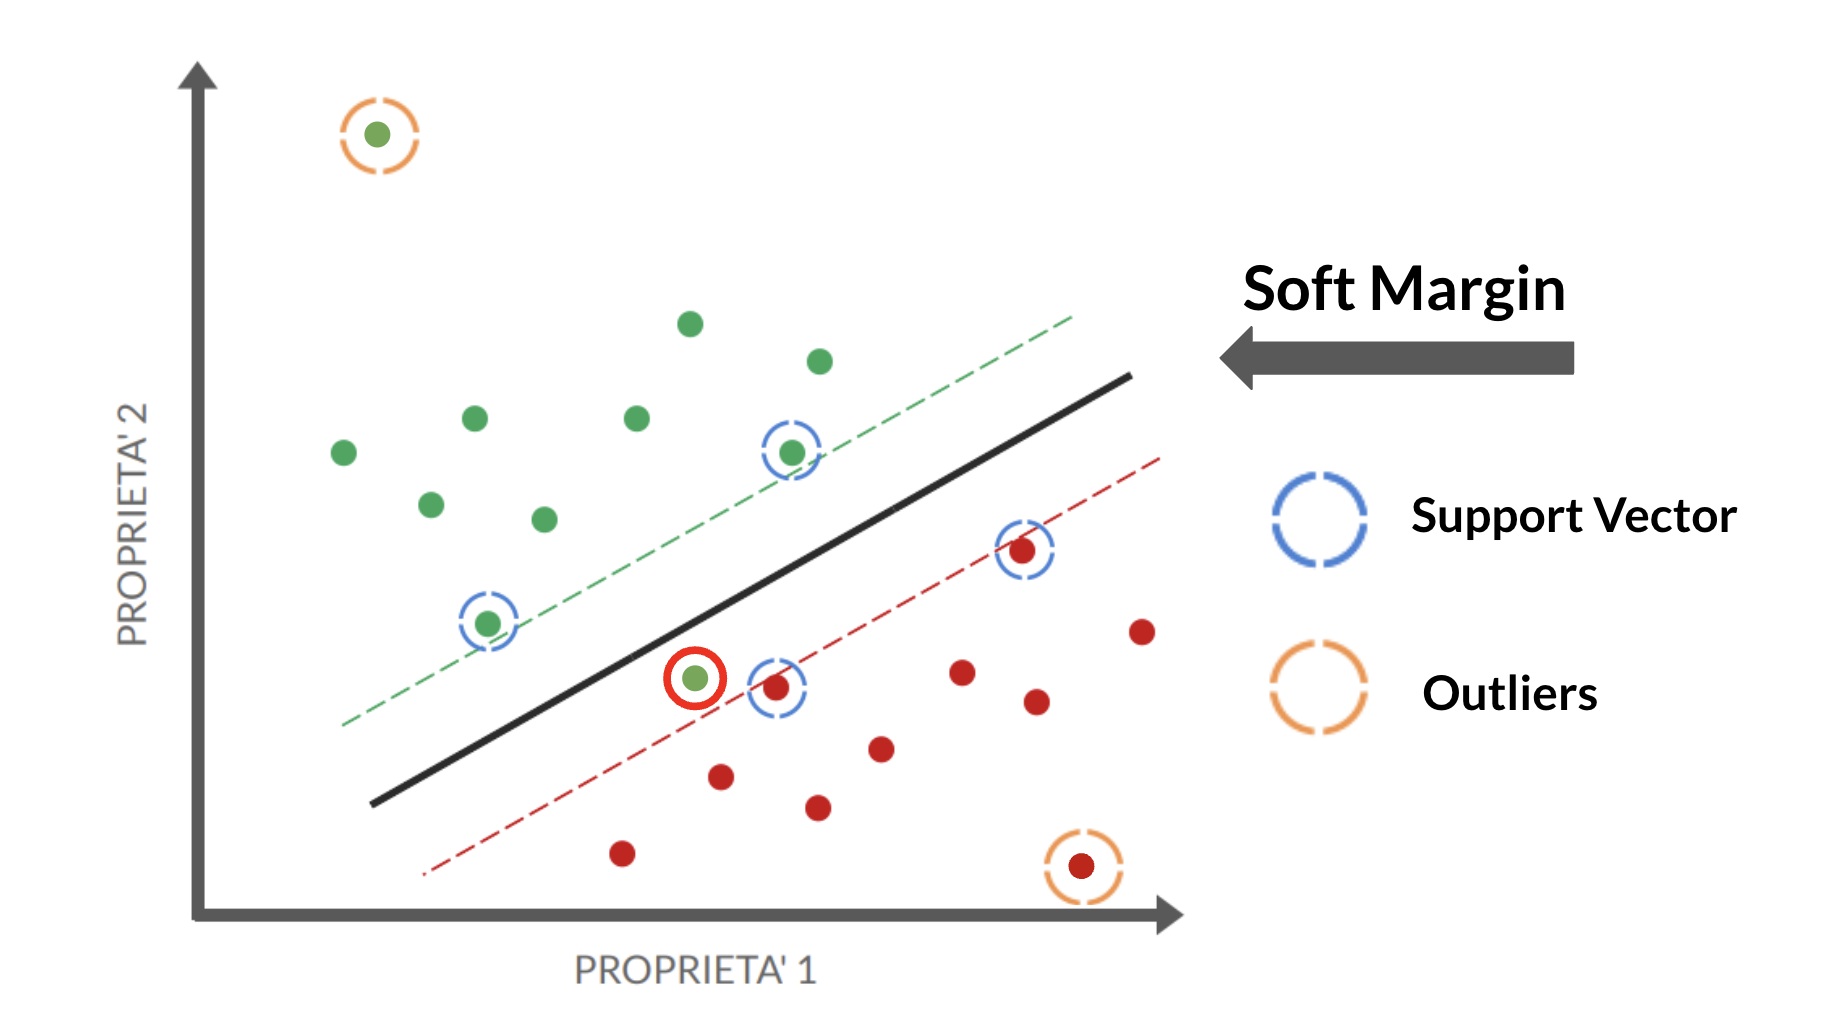

i vettori usati per definire i margini vengono definiti vettori di supporto

**come vengono scelti i vettori di supporto?** <br>
- in fase di train
- dist tra tutte le coppie di obs, si vede quanti sono gli errori e quante le classificazioni esatte

- regressione logistica: impara dagli esempi di ogni classe (es. se cerco gatti vs tigri, gatto ideale e tigre ideale)
- svc: impara dalle obs più promiscue di ogni classe (es. di gatto che può essere confuso con tigre e viceversa)
<br><br><br>
queste obs diventano i vettori di supporto

gli outliar non hanno effetti sul modello

Per addestrare un svc è necessario calcolare la somiglianza tra ogni esempio del train set

**Pro del svc**
1. resistente agli outliar
2. buoni risultati con pochi dati
3. efficiente in spazi dimensionali elevati
4. richiede poche risorce di calcolo
<br> <br>
2 e 3 -> anche quando n_features > n_esempi

**usalo se** 
- pochi dati 
- molti outliar
- tante feature
- poche risorse di calcolo

## SVC e relazioni non lineari

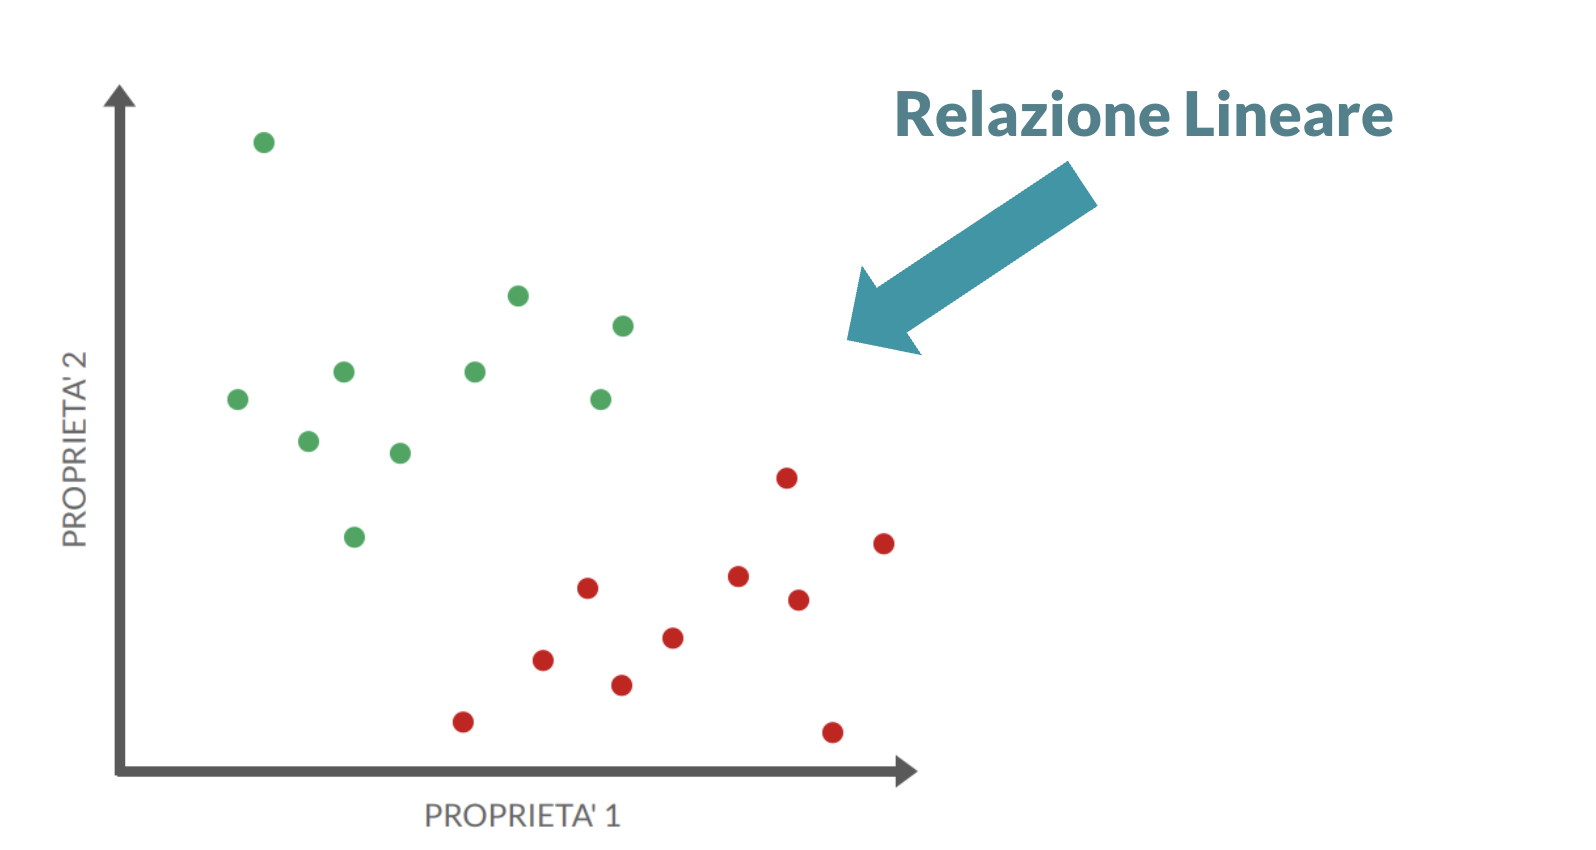

SVC falliscono in caso di relazioni non lineari, $ \nexists $ retta che taglia in due i dati

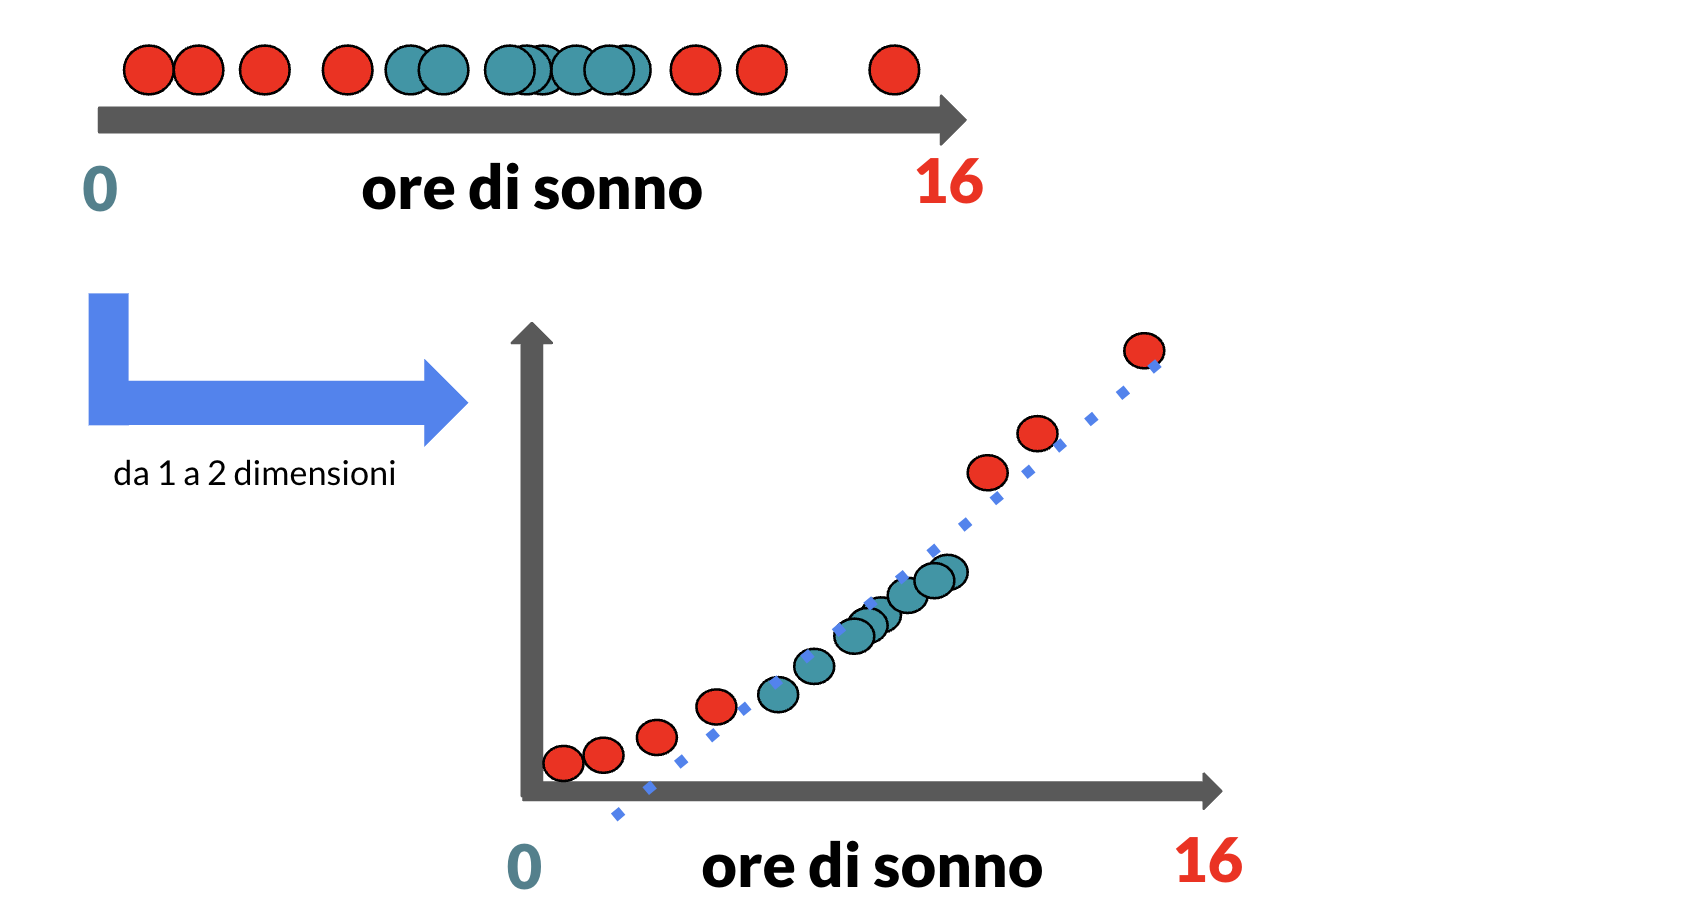

proietto i dati in uno spazio di dimensione superiore, 
- nel caso sopra $\nexists$ punto che separa in due i dati 
- nel caso sotto, proiettando retta a piano, $\exist$ una retta che taglia in due i dati

proietto le ore di sonno con le ore di sonno al quandrato $f(x) = x^2$

- in 1dim è il punto che taglia i dati
- in 2dim è la retta
- in 3dim è il piano 
<br>
<br>
etc

mappare dati in uno spazio superiore può essere computazionalmente eccessivamente dispendiosa ma...

**Kernel Trick**

il kernel è una funzione che misura somiglianza tra due osservazioni $k(x,z) = \langle \phi(x), \phi(z) \rangle $ come indicato da addestramento SVC

il kernel trick mi consente di calcolare la somiglianza tra obs nello spazio superiore senza effettivamente eseguire la proiezione

1. dati non linearmente separabili in spazio originale, $(x_i, y_i)$ con $x_i$ vettore delle feauture e $y_i$ etichetta di classe corrispondente
2. il kernel mi serve per mappare i dati in uno spazio dim+1 con una funzione $k(x^a, x^b)$, ottengo cosi separazione lineare nel nuovo spazio
3. la funzione k calcola il prodotto scalare tra i vettori $x^a, x^b$ con $x^a$ vettore della classe positiva e $x^b$ vettore della classe negativa, nello spazio dim+1. Il prodotto è una misura della similarità tra i dati $x^a$ e $x^b$ dopo la proiezione.
due vettori ortogonali, hanno $ cos = 0 $, se sono paralleli $cos = 1$, quindi più simili
4. con il kernel trick posso scrivere il problema di ottimizzazione dell'SVM come prodotto scalare tra i vettori delle feature mappate
$max_\alpha\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i,j=1}^Ny_iy_j\alpha_i\alpha_jk(x_i,x_j)$
soggetto ai vincoli $\sum_{i=1}^N\alpha_iy_i = 0$ e $0 \leq \alpha_i \leq C$ per $(i = 1,...,N)$ <br>
devo trovare coeff che mi consentono di trovare valore max dell'espressione
- $\alpha\$ sono i coeff.
5. il problema dipende solo dalla combinazione dei dati dati dal prodotto scalare, non dal valore effettivo delle feature, per cui non serve conoscere la funzione di mapping che porta i dati allo spazio dim+1
6. l'ipotesi di separazione dipende solo dalla similarità dei vettori nello spazio dim+1

**Kernel Lineare**
<br>
- dati già separabili nello spazio lineare, non utila 
$K \langle a,b \rangle = a,b$

**kernel polinomiale**
- dati separabili da iperpiano curvo
<br>
$K(a,b) = (\gamma\langle a,b \rangle + r) ^ d$

**Kernel gaussiano o rdb (radial basis function)** <br>
- consente di modellare una vasta gamma di funzioni e forme di separazione <br>
- simula dati in proiezioni di dim infinite

$K(a,b) = e^{-\gamma||a-b||^2}$

**Kernel sigmoidale**
- dati modellati da sigmoide 

$K(a,b) = tanh(\gamma\langle a,b\rangle+r)$

**cosa è $\gamma$?**
- iperparametro che stabilisce l'influenza che ogni obs ha sulle altre e quindi controllare bias e varianza


# Pratica

## Maximal margin classifier

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

RANDOM_SEED = 6

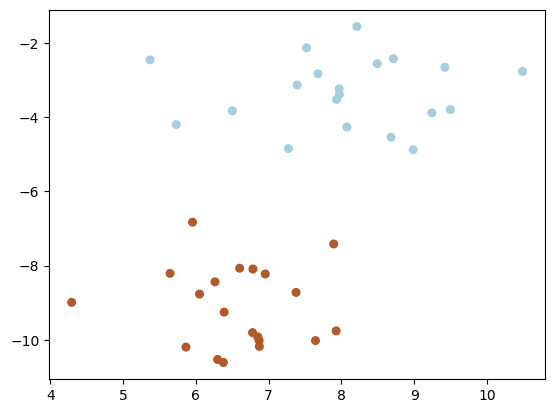

In [57]:
X, y = make_blobs(
    n_samples=40,
    centers=2,
    random_state=RANDOM_SEED
)
plt.scatter(X[:,0], X[:, 1], c=y, s = 30, cmap=plt.cm.Paired)

in questo caso il piano che meglio separa i dati è una retta, usiamo un kernel lineare

In [58]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

## SVM

In [59]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

In [60]:
RANDOM_SEED = 0

In [61]:
def plot_soft_margin(model, data, show_sv = False):
    X, y = data
    plt.scatter(X[:,0], X[:,1], c = y, s = 30, cmap = plt.cm.Paired)

    ax = plt.gca()

    DecisionBoundaryDisplay.from_estimator(
        model, 
        X, 
        ax=ax,
        alpha = .5,
        plot_method = 'contour',
        levels = [-1,0,1],
        linestyles = ["--", "-", "--"],
        colors = 'k'
    )

    if show_sv:
        ax.scatter(
            model.support_vectors_[:,0],
            model.support_vectors_[:,1],
            s=100,
            linewidth = 1,
            facecolors = "none",
            edgecolor = "k"
        )

    plt.show()


In [62]:
def print_classification_report(model, data):
    X, y = data
    y_pred = model.predict(X)
    report = classification_report(y_pred, y)
    print(report)


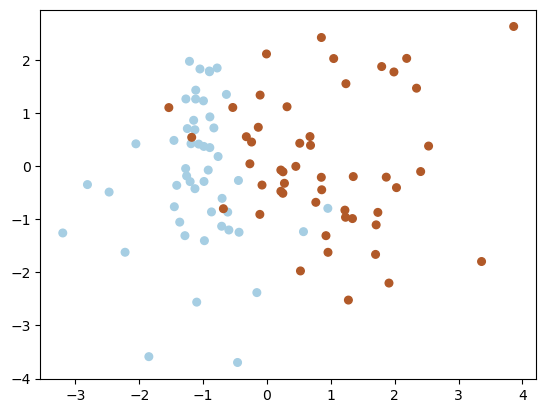

In [63]:
X,y = make_classification(
    n_samples=100,
    n_features=2, 
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=RANDOM_SEED
)

plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap = plt.cm.Paired)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=RANDOM_SEED)

In [65]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [66]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
print_classification_report(svc_linear, (X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



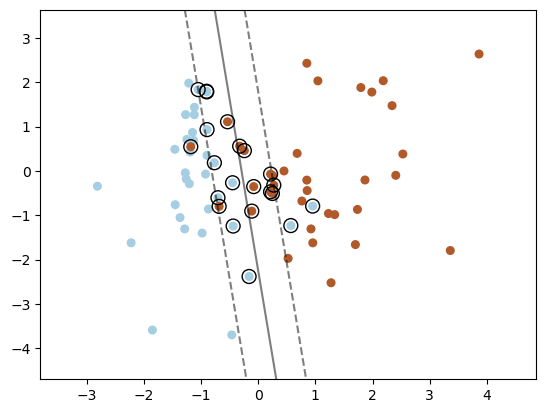

In [67]:
plot_soft_margin(svc_linear, (X_train , y_train), show_sv=True)

il vettore di supporto è tale per cui se viene modificato uno modifica il modello, per cui tutti gli esempi dentro i margini vengono definiti come vettori di supporto

### rimozione outliar

In [68]:
X_train[:,0]>3.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [69]:
outliar = np.where(X_train[:,0]>3.5)
outliar

(array([19]),)

In [70]:
X_train2 = np.delete(X_train, outliar, axis=0)
y_train2 = np.delete(y_train, outliar, axis=0)

In [71]:
X_train.shape

(70, 2)

In [72]:
X_train2.shape

(69, 2)

In [73]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train2 , y_train2)
print_classification_report(svc_linear, (X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



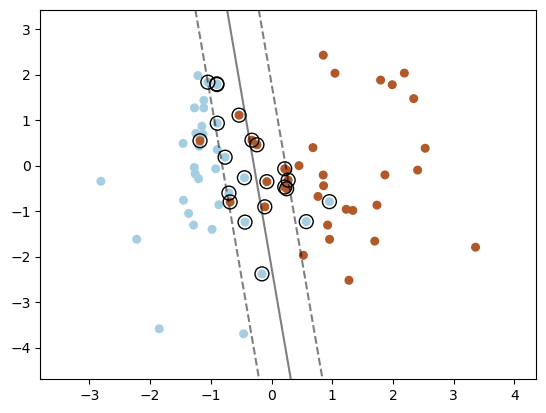

In [74]:
plot_soft_margin(svc_linear, (X_train2 , y_train2), show_sv=True)

rimuovendo un outliar non si hanno effetti sul modello e sui margini trovati

### caso estremo: rimuoviamo tutti gli outliar

come fare? verificare se z-score > dev. std

In [75]:
from scipy import stats

In [76]:
outlier_map = np.abs(stats.zscore(X_train)<X_train.std(axis=0))
outlier_map = outlier_map[:,0] & outlier_map[:,1]
outlier_map

array([ True, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [77]:
X_train3 = X_train[outlier_map]
y_train3 = y_train[outlier_map]

X_train3.shape

(55, 2)

In [78]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train3 , y_train3)
print_classification_report(svc_linear, (X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



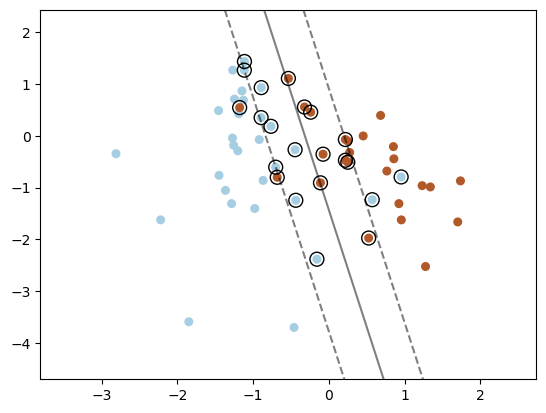

In [79]:
plot_soft_margin(svc_linear, (X_train3 , y_train3), show_sv=True)

## Uso dei vari kernel

In [80]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_circles
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [81]:
RANDOM_SEED = 0

In [82]:
def print_classification_report(model, data):
    X,y = data
    y_pred = model.predict(X)
    report = classification_report(y, y_pred)
    print(report)
    


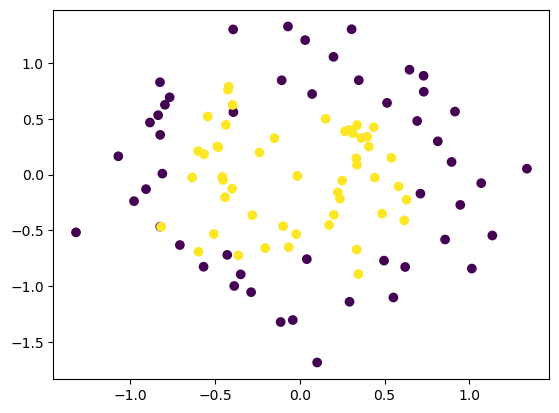

In [83]:
X,y = make_circles(
    noise = .2,
    factor = .5,
    random_state=RANDOM_SEED
)
plt.scatter(X[:,0], X[:,1], c=y)

In [84]:
!wget https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/refs/heads/main/script/viz.py

--2025-08-17 14:02:31--  https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/refs/heads/main/script/viz.py
Risoluzione di raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connessione a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1088 (1,1K) [text/plain]
Salvataggio in: «viz.py.2»

viz.py.2            100%[===================>]   1,06K  --.-KB/s    in 0s      

2025-08-17 14:02:31 (79,8 MB/s) - «viz.py.2» salvato [1088/1088]



In [85]:
from viz import plot_decision_boundary

In [86]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X,y, test_size=.3, random_state=RANDOM_SEED)

### Kernel lineare

In [87]:
svc = SVC(kernel = 'linear', probability=True)
svc.fit(X_train_c, y_train_c)
print_classification_report(svc,(X_test_c,y_test_c))

              precision    recall  f1-score   support

           0       0.55      0.38      0.44        16
           1       0.47      0.64      0.55        14

    accuracy                           0.50        30
   macro avg       0.51      0.51      0.49        30
weighted avg       0.51      0.50      0.49        30



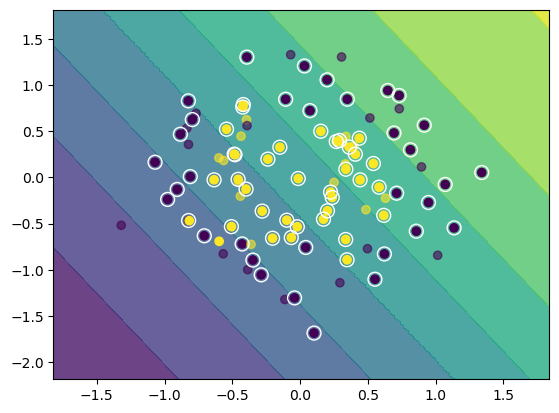

In [88]:
plot_decision_boundary(svc, (X_train_c, y_train_c), (X_test_c, y_test_c), sv = svc.support_vectors_)

### Kernel polinomiale

In [89]:
poli = SVC(kernel='poly', probability=True)
poli.fit(X_train_c, y_train_c)
print_classification_report(poli,(X_test_c, y_test_c))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.61      1.00      0.76        14

    accuracy                           0.70        30
   macro avg       0.80      0.72      0.68        30
weighted avg       0.82      0.70      0.68        30



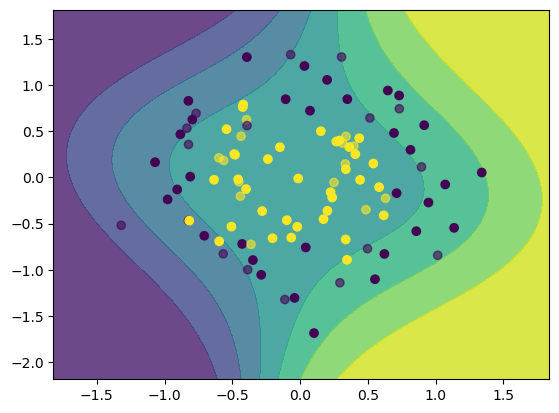

In [90]:
plot_decision_boundary(poli, (X_train_c, y_train_c), (X_test_c, y_test_c))

### kernel sigmoidale

In [91]:
sigm = SVC(kernel='sigmoid', probability=True)
sigm.fit(X_train_c, y_train_c)
print_classification_report(sigm,(X_test_c, y_test_c))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40        16
           1       0.38      0.43      0.40        14

    accuracy                           0.40        30
   macro avg       0.40      0.40      0.40        30
weighted avg       0.40      0.40      0.40        30



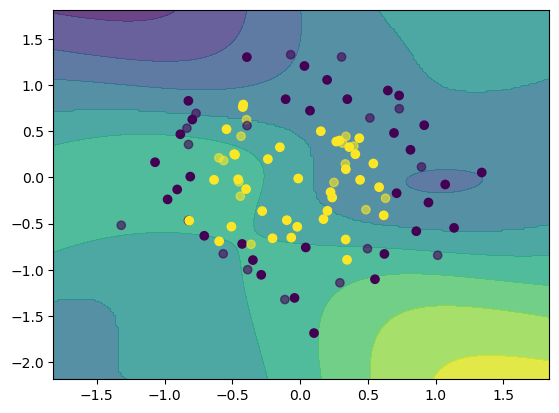

In [92]:
plot_decision_boundary(sigm, (X_train_c, y_train_c), (X_test_c, y_test_c))

### Kernel Gaussiano

In [93]:
rbf = SVC(kernel='rbf', probability=True)
rbf.fit(X_train_c, y_train_c)
print_classification_report(rbf,(X_test_c, y_test_c))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



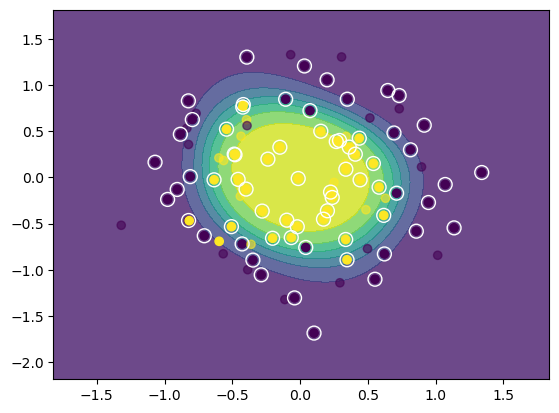

In [94]:
plot_decision_boundary(rbf, (X_train_c, y_train_c), (X_test_c, y_test_c), sv= svc.support_vectors_)

# Esercitazione

Puoi scaricare il dataset [da qui](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset), di seguito le variabili che contiene:

 - **age**: Età del paziente

 - **sex**: Sesso del paziente

 - **cp**: Tipo di dolore toracico, 0 = Angina tipica, 1 = Angina atipica, 2 = Dolore non anginoso, 3 = Asintomatico

 - **trtbps**: Pressione arteriosa a riposo (in mm Hg)

 - **col**: Colesterolo in mg/dl rilevato tramite il sensore BMI

 - **fbs**: (glicemia a digiuno > 120 mg/dl), 1 = vero, 0 = falso

 - **restecg**: Risultati elettrocardiografici a riposo, 0 = normale, 1 = normalità dell'onda ST-T, 2 = ipertrofia ventricolare sinistra

 - **thalachh**: Frequenza cardiaca massima raggiunta

 - **oldpeak**: Picco precedente

 - **slp**: Pendenza

 - **caa**: Numero di vasi principali

 - **thall**: Risultato dello Stress Test al Tallio ~ (0,3)

 - **exng**: Angina indotta dall'esercizio ~ 1 = Sì, 0 = No

 - **output**: Variabile target

In [95]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer

In [96]:
BASE_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/datasets/"
RANDOM_SEED = 0

In [97]:
def print_classification_report(model, data):
    X,y = data
    y_pred = model.predict(X)
    report = classification_report(y, y_pred)
    print(report)
    print(confusion_matrix(y,y_pred))

In [98]:
df = pd.read_csv(BASE_URL+'heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [100]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


dati su scale diverse da standardizzare

In [101]:
X = df.drop(['output'], axis=1).values
y = df['output'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)
X_train.shape

(242, 13)

### processiamo di dati 

In [102]:
ct = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(), [2])
    ],
    remainder = 'passthrough'
)

In [103]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

X_train.shape

(242, 16)

In [104]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [105]:
print(X_train.mean(), X_train.std())

-1.3304325501706421e-16 1.0000000000000002


### Baseline

In [107]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print_classification_report(lr,(X_test,y_test))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

[[21  6]
 [ 4 30]]


per il caso specifico dobbiamo portare a 0, o avvicinarci quanto piu possibile, i falsi negativi 

### svc - lineare

In [108]:
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
print_classification_report(linear_svc, (X_test, y_test))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

[[21  6]
 [ 4 30]]


### rbf

In [109]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
print_classification_report(rbf, (X_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

[[21  6]
 [ 2 32]]


molto meglio, ma obiettivo è portare il tn a 0 (ora a 2), possiamo applicare dei pesi alle classi

In [111]:
rbf = SVC(kernel='rbf', class_weight={1:1.5, 0:0.5})
rbf.fit(X_train, y_train)
print_classification_report(rbf, (X_test, y_test))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74        27
           1       0.76      0.94      0.84        34

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61

[[17 10]
 [ 2 32]]
